# COVID-19 Country-Level Analysis
Dataset: `country_wise_latest.csv`

**Flow**: Load → Clean → Explore → Visualize → Summarize

## 1) Data Loading & Exploration

In [1]:
import pandas as pd
from IPython.display import display

csv_path = "country_wise_latest.csv"
df = pd.read_csv(csv_path)
print("Shape:", df.shape)
print("Columns:", list(df.columns))
display(df.head())
print("\nMissing values per column:")
print(df.isnull().sum())

Shape: (187, 15)
Columns: ['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'a', 'Deaths / 100 Recovered', 'Confirmed last week', '1 week change', '1 week % increase', 'WHO Region']


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,a,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,s,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa



Missing values per column:
Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
a                         0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


## 2) Cleaning, Visualizations, and Insights

Shape: (187, 15)
Columns: ['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'a', 'Deaths / 100 Recovered', 'Confirmed last week', '1 week change', '1 week % increase', 'WHO Region']

Head:


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,a,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Recovery Rate (%),Death Rate (%)
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,69.486805,3.499435
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,56.250000,2.950820
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,67.339935,4.157581
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,s,884,23,2.60,Europe,88.533627,5.733186
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,25.473684,4.315789



Missing values per column:
Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
a                         0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
Recovery Rate (%)         0
Death Rate (%)            0
dtype: int64

Basic stats for numeric columns:
          Confirmed         Deaths     Recovered        Active     New cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02 

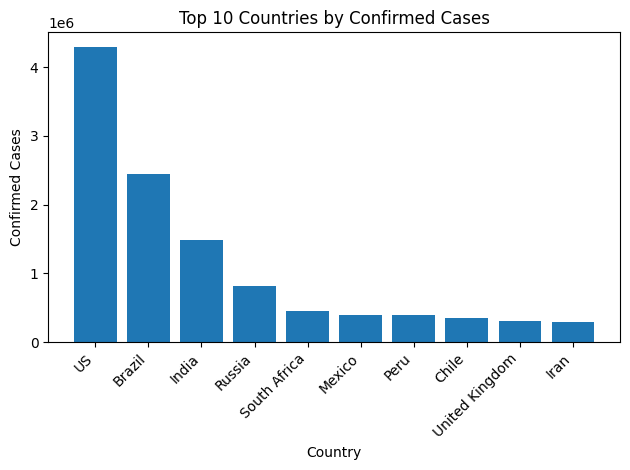

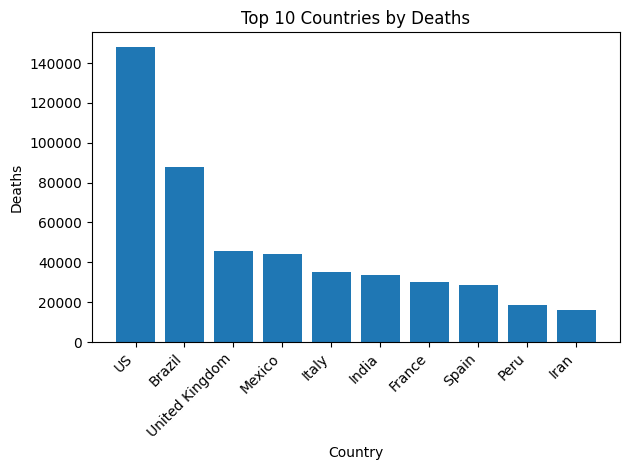

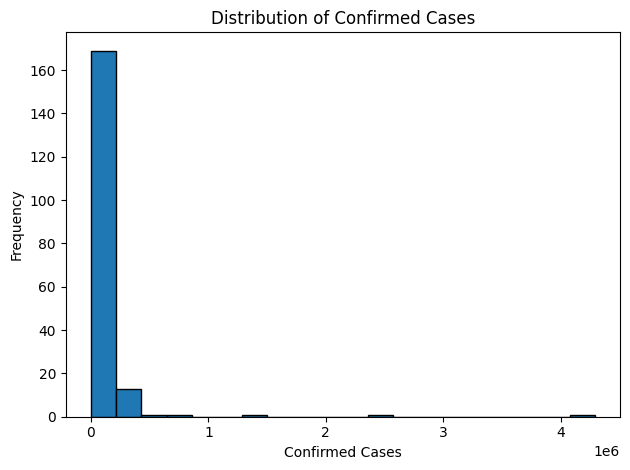

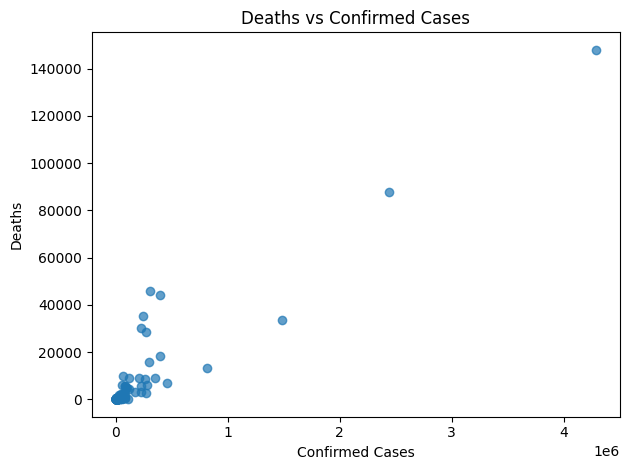

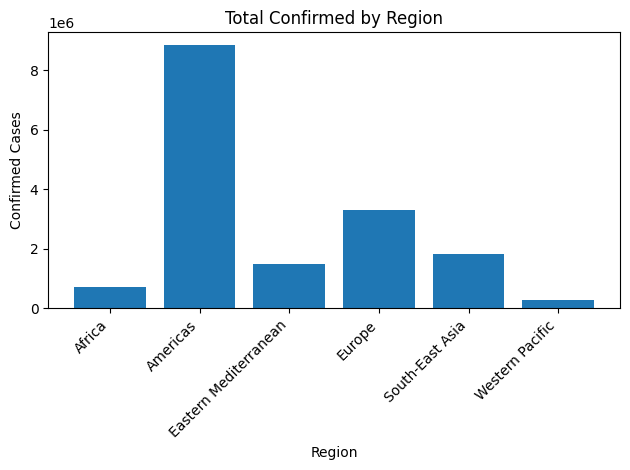


Top 10 by Confirmed Cases:
 Country/Region  Confirmed
            US    4290259
        Brazil    2442375
         India    1480073
        Russia     816680
  South Africa     452529
        Mexico     395489
          Peru     389717
         Chile     347923
United Kingdom     301708
          Iran     293606

Top 10 by Deaths:
 Country/Region  Deaths
            US  148011
        Brazil   87618
United Kingdom   45844
        Mexico   44022
         Italy   35112
         India   33408
        France   30212
         Spain   28432
          Peru   18418
          Iran   15912

Saved summary to insights_summary.txt


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CSV_PATH = "country_wise_latest.csv"  # update if your file is elsewhere
df = pd.read_csv(CSV_PATH)

print("Shape:", df.shape)
print("Columns:", list(df.columns))

def pick_first_matching(colnames, candidates):
    lower = {c.lower(): c for c in colnames}
    for cand in candidates:
        if cand.lower() in lower:
            return lower[cand.lower()]
    return None

country_col = pick_first_matching(df.columns, ["Country/Region", "Country", "Location", "location", "Country_Name"])
confirmed_col = pick_first_matching(df.columns, ["Confirmed", "TotalConfirmed", "Total Cases", "Total_Cases", "Cases"])
deaths_col = pick_first_matching(df.columns, ["Deaths", "TotalDeaths", "Total Deaths", "Total_Deaths"])
recovered_col = pick_first_matching(df.columns, ["Recovered", "TotalRecovered", "Total Recovered", "Total_Recovered"])
active_col = pick_first_matching(df.columns, ["Active", "Active Cases", "Active_Cases"])
region_col = pick_first_matching(df.columns, ["WHO Region", "Region"])

required_any = [country_col, confirmed_col, deaths_col]
if any(x is None for x in required_any):
    raise ValueError(f"Missing required columns. Detected -> country: {country_col}, confirmed: {confirmed_col}, deaths: {deaths_col}")

df[country_col] = df[country_col].astype(str).str.strip()

for c in [confirmed_col, deaths_col, recovered_col, active_col]:
    if c is not None and c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

for c in [confirmed_col, deaths_col, recovered_col, active_col]:
    if c is not None and c in df.columns:
        df[c] = df[c].fillna(0)

if recovered_col is not None and recovered_col in df.columns:
    df["Recovery Rate (%)"] = (df[recovered_col] / df[confirmed_col]).where(df[confirmed_col] > 0, np.nan) * 100

df["Death Rate (%)"] = (df[deaths_col] / df[confirmed_col]).where(df[confirmed_col] > 0, np.nan) * 100

print("\nHead:")
try:
    from IPython.display import display
    display(df.head())
except Exception:
    print(df.head())

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nBasic stats for numeric columns:")
print(df.describe())

# 1) Top 10 by Confirmed
top_confirmed = df.sort_values(by=confirmed_col, ascending=False).head(10)
plt.figure()
plt.bar(top_confirmed[country_col], top_confirmed[confirmed_col])
plt.title("Top 10 Countries by Confirmed Cases")
plt.xlabel("Country")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 2) Top 10 by Deaths
top_deaths = df.sort_values(by=deaths_col, ascending=False).head(10)
plt.figure()
plt.bar(top_deaths[country_col], top_deaths[deaths_col])
plt.title("Top 10 Countries by Deaths")
plt.xlabel("Country")
plt.ylabel("Deaths")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 3) Histogram of Confirmed
plt.figure()
plt.hist(df[confirmed_col].dropna(), bins=20, edgecolor="black")
plt.title("Distribution of Confirmed Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 4) Scatter: Deaths vs Confirmed
plt.figure()
plt.scatter(df[confirmed_col], df[deaths_col], alpha=0.7)
plt.title("Deaths vs Confirmed Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("Deaths")
plt.tight_layout()
plt.show()

# Optional by Region
if region_col is not None and region_col in df.columns:
    region_totals = df.groupby(region_col, as_index=False)[[confirmed_col, deaths_col]].sum(numeric_only=True)
    plt.figure()
    plt.bar(region_totals[region_col], region_totals[confirmed_col])
    plt.title("Total Confirmed by Region")
    plt.xlabel("Region")
    plt.ylabel("Confirmed Cases")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

top10_cases = df.sort_values(by=confirmed_col, ascending=False)[[country_col, confirmed_col]].head(10)
top10_deaths = df.sort_values(by=deaths_col, ascending=False)[[country_col, deaths_col]].head(10)

print("\nTop 10 by Confirmed Cases:\n", top10_cases.to_string(index=False))
print("\nTop 10 by Deaths:\n", top10_deaths.to_string(index=False))

lines = []
lines.append("COVID-19 Country-Level Snapshot Summary\n")
lines.append("Top 10 Countries by Confirmed Cases:\n")
lines.extend(top10_cases.to_string(index=False).splitlines())
lines.append("\nTop 10 Countries by Deaths:\n")
lines.extend(top10_deaths.to_string(index=False).splitlines())

if "Recovery Rate (%)" in df.columns:
    best_recovery = df.dropna(subset=["Recovery Rate (%)"]).sort_values("Recovery Rate (%)", ascending=False).head(5)
    lines.append("\nBest Recovery Rates (%):\n")
    lines.extend(best_recovery[[country_col, "Recovery Rate (%)"]].to_string(index=False).splitlines())

with open("insights_summary.txt", "w", encoding="utf-8") as f:
    f.write("\n".join(lines))

print("\nSaved summary to insights_summary.txt")
